# Northwestern Data Analysis

This notebook shows how to perform buffer subtraction using the FTIR tool suite developed by KBI Biopharma. 

Buffer subtraction tool kit was built to quickly and repeatably subtract buffer spectra from sample absorbance spectra. Historically, this process has been done manually, using visually assessment to determine the proper scaling factor to apply to the buffer spectra prior to substracting from the sample spectra. Two primary functions were built to automate this excercise and improve the repeatability. 

The first function `find_buffer_subtraction_constant` determines the constant scaling value to use for buffer subtraction. The second function `buffer_subtract` takes the absorbance data, and performs the buffer subtraction. Both functions are fairly simple, and their usage is demonstrated below. 


In [6]:
# Imports and pull in some data
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
from ftir.io.utils import create_df_from_multiple_files
from ftir.modeling.buffer_subtraction import find_buffer_subtraction_constant, buffer_subtract
from ftir.modeling.peak_fitting import gaussian_least_squares, secondary_structure, sd_baseline_correction
from ftir.modeling.peak_definitions import yang_d20_2015, yang_h20_2015
from scipy.spatial import ConvexHull


location = os.getcwd()
d2o_buffer = os.path.abspath("data/D2O Buffer_0.txt")
h2o_buffer = os.path.abspath("data/H2O Buffer_0.txt")

d2o_samples = ['Sample in D2O_0.txt', 'OVA in D2O_0.txt', 'OVA in D2O r2_0.txt']
h2o_samples = ['Protein in H2O_0.txt']
d2o_filenames = [location + '/data/' + i for i in d2o_samples]
h2o_filenames = [location + '/data/' + i for i in h2o_samples]

d2o_files = [d2o_buffer] + d2o_filenames
h2o_files = [h2o_buffer] + h2o_filenames

#d2o_df, a = create_df_from_multiple_files(d2o_files)
h2o_df, a = create_df_from_multiple_files(h2o_files)



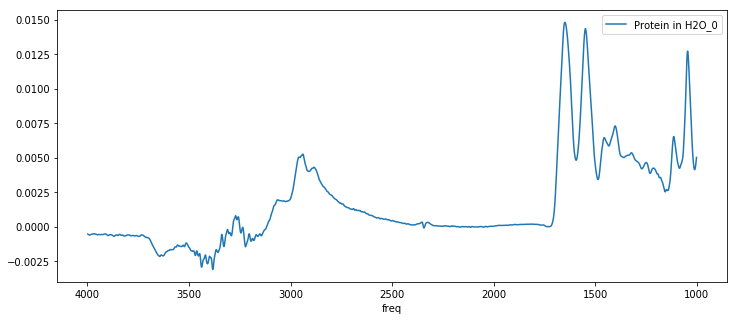

In [7]:
h2o_sub = buffer_subtract(h2o_df)
ax = h2o_sub.plot(x='freq', figsize=(12,5))
ax.invert_xaxis()

In [17]:
d2o_samples = ['Sample in D2O_0 2Der.txt', 'OVA in D2O_0 2Der.txt', 'OVA in D2O r2_0 2Der.txt']
h2o_samples = ['Protein in H2O_0 2Der.txt']

d2o_filenames = [location + '/data/second der/' + i for i in d2o_samples]
h2o_filenames = [location + '/data/second der/' + i for i in h2o_samples]

d2o_files = d2o_filenames
h2o_files = h2o_filenames

d2o_df, a = create_df_from_multiple_files(d2o_files)
h2o_df, a = create_df_from_multiple_files(h2o_files)

In [4]:
index = 1
area, res = gaussian_least_squares(h2o_df, h2o_df.columns[index], peaks=yang_h20_2015)
structs = secondary_structure(area, yang_h20_2015)
print(structs)

ValueError: `x0` is infeasible.

In [18]:
import numpy as np
def rubberband(x, y):
    # Find the convex hull
    v = ConvexHull(np.column_stack([x, y])).vertices
    v = np.roll(v, -v.argmin())
    # Leave only the ascending part
    v = v[:v.argmax()]
    # Create baseline using linear interpolation between vertices
    return y - np.interp(x, x[v], y[v])

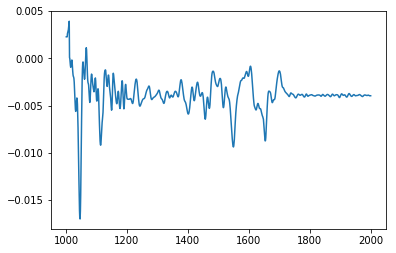

In [19]:
plt.plot(h2o_df['freq'], rubberband(h2o_df['freq'], h2o_df['buffer']))